 <h1 align = center> Principles of Object Oriented Programming </h1>

#### 4 principles
- Encapsulation
- Abstraction
- Inheritance
- Polymorphism


## 1 ENCAPSULATION

In encapsulation, the variables of a class can be made hidden from other classes, and can be accessed only through the methods of their current class. Therefore, it is also known as data hiding.
<br><br>
Encapsulation can be described as a protective barrier that prevents the code and data being randomly accessed by other code defined outside the class. Access to the data and code is tightly controlled by a class.

In [123]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'

class MyVideo():
    def __init__(self):
        self.title = ''
        self.length = ''
        self.genre = ''
        self.director = ''
        self.top_billed_cast = []
        self.cast = []
        
    def change_genre(self):
        genre_value = input("What genre would you like to enter? ")
        self.genre = genre_value
        print(f"Your video's genre is {self.genre}")
        
    def add_member(self,member):
        self.cast.append(member)
        
    def movie_name(self):
        movie = input("What movie would you like to watch? ")
        self.title = movie
        print(f"You are now watching {self.title.title()}.")
        
    def pick_video(self):
        choice = input("What do you want to watch? ")
        self.title = choice
        print(f"You are now watching {self.title}.")
        
    def length_video(self):
        len_vid = input("How long would you like to watch? ")
        self.length = length
        print(f"You're playtime is {self.length} minutes.")
    
    def genre_video(self):
        gen_vid = input("What genre would you like to watch? ")
        self.genre = gen_vid
        print(f"You're genre is {self.genre}.")
        
    def director_video(self):
        dir_vid = input("Who is the director? ")
        self.director = dir_vid
        print(f"{self.director} is now directing your video.")
        
    def cast_video(self):
        cast_vid = input("Who is cast in your video? ")
        self.cast.append(cast_vid)
        
    def top_billed(self):
        top_billed = input("Who is the highest paid? ")
        self.top_billed_cast.append(top_billed)
    
    def __repr__(self):
        return f"You're watching {self.title} it is a {self.genre} movie baby!"

In [17]:
#happy encapsulation

video = MyVideo()
video.movie_name()
video.top_billed()
print(video)

What movie would you like to watch? kungfu panda
You are now watching Kungfu Panda.
Who is the highest paid? jack sparrow
You're watching kungfu panda it is a  movie baby!


In [18]:
#sad encapsulation
video.title = "Kung Pow"
print(video)

You're watching Kung Pow it is a  movie baby!


## 2 ABSTRACTION

Abstraction is a process of hiding the implementation details from the user, only the functionality will be provided to the user. We have a bit to do before this becomes visible. But you've seen it before with presenting the user with the option to enter inputs. We then take those input and do something with them.
<br><br>


In [124]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'

class Video():
    def __init__(self):
        self.title = None
        self.length = timedelta()
        self.link = generic_image
    
    def play(self):
        print(f"Now playing: {self.title}")
        display(Image(self.link))
    
    def __repr__(self):
        return f"{self.title} is {self.length.seconds} seconds long."

## 3 INHERITANCE

Inheritance can be defined as the process where one class acquires the properties (methods and fields) of another.
<br>
<i>(see above)</i>

In [125]:
class Episode(Video):
    def __init__(self, data):
        Video.__init__(self)
        self.number = data['number']
        self.season = data['season']
        self.date_aired = data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.title = data['name']
        self.length = timedelta(minutes = data['runtime'])
        if data['image']:
            self.link = data['image']['medium']
#         else:
#             self.link = generic_image
        
        

## 4 POLYMORPHISM

In object-oriented programming, polymorphism (from the Greek meaning “having multiple forms”) is the characteristic of being able to assign a different meaning or usage to something in different contexts — specifically, to allow an entity such as a function, or an object to have more than one form.
<br><br>


In [126]:
class Series():
    def __init__(self):
        self.id = None
        self.netword = None
        self.seasons = None
        self.summary = None
        self.title = None
        self.genres = []
        self.episodes = []
        self.poster = None
        
    def get_info(self, query = ''):
        data = None
        while not data:
            if not query:
                query = input("What is the name of the series? ")
            r = requests.get(f"https://api.tvmaze.com/singlesearch/shows?q={query}")
            if r.status_code == 200:
                data = r.json()
                print(data)
            else:
                print(f"Series error: status code {r.status_code}")
        
        #Use data from api call to build our attributes
        self.id = data['id']
        self.title = data['name']
        self.genres = [genre for genre in data['genres']]
        if data['image']:
            self.poster = data['image']['medium']
        else:
            self.poster = generic_image
        self.summary = data['summary']
        if data['network']:
            self.network = data['network']['name']
        else:
            self.network = data['webChannel']['name']
     
        #Api call for the episodes
        
        r = requests.get(f"https://api.tvmaze.com/shows/{self.id}/episodes")
        if r.status_code == 200:
            episodes = r.json()
        else:
            print(f"Episode Error: Status Code {r.status_code}")
            
        self.seasons = episodes[-1]['season']
        self.episodes = [Episode(ep) for ep in episodes]
        print(f"{self.title} has {len(self.episodes)} episodes")
    
    def watch(self):
        for i in range(len(self.episodes)):
            if i > 0 and i % 3 == 0:
                watching = input("Are you still watching? y/n: ")
                if watching.lower().strip() not in ('yes', 'y'):
                    break
            self.episodes[i].play()
            sleep(self.episodes[i].length.seconds/1000)
            
    def __len__(self):
        return len(self.episodes)
    
    def __repr__(self):
        return f"Title: {self.title}"

In [86]:
first_show = Series()
first_show.get_info()


KeyboardInterrupt: Interrupted by user

In [47]:
print(first_show.episodes)

[]


In [48]:
first_show.watch()

In [127]:
class User:
    id_counter = 1
    def __init__(self, username, password):
        self.username = username
        self.password = password[::-2]
        self.id = User.id_counter
        User.id_counter += 1
        self.watch_list = []
        
    def __str__(self):
        formatted_user = f"""
        {self.id} - {self.username.title()}
        pw: {self.password}
        """
        return formatted_user
    
    def __repr__(self):
        return f"<User {self.id} | {self.username}"
    
    def check_password(self, password_guess):
        return self.password == password_guess[::-2]

In [121]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix (1).png'
class Theater():
    def __init__(self):
        self.users = set()
        self.current_user = None
    #add user
    def add_user(self):
        username = input("Please enter a username: ")
        if username in {u.username for u in self.users}:
            print("User with that name already exists. Please try again...") 
        else:
            password = input("Please enter your password: ")
            user = User(username, password)
            self.users.add(user)
            print(f"{user} have been created")
            
        self.login_user()
    #choose/login a user
    def login_user(self):
        username = input("What is your username? ")
        password = input("What is your password? ")
        
        for user in self.users:
            if user.username == username and user.check_password(password):
                self.current_user = user
                print(f"{user} has logged in!")
                break
        else:
            print("Username and/or password is incorrect!")
    
    #logout a user:
    def logout(self):
        self.current_user = None
        print("You have successfully logged out!")
    
    #update user info
    def update_user(self):
        if self.current_user:
            print(self.current_user)
            new_user = input("Please enter the updated username or enter skip to keep your current username!")
            if new_user.lower() != 'skip':
                self.current_user.username == new_user
            new_pw = input("Please enter the updated password or enter skip to keep current password!")
            if new_pw.lower() != 'skip':
                self.current_user.password = new_pw[::-2]
            print(f"{self.current_user.username}'s info has been updated!")
        else:
            print("Please login to update user")
            self.login_user
        
    #watchlist related functionality
    def add_to_watchlist(self, query = ''):
        show = Series()
        show.get_info(query)
        
        self.current_user.watch_list.append(show)
        
        print(f"{show.title} has been added to the watchlist!")
        
    #view watchlist
    def view_watchlist(self):
        for series in self.current_user.watch_list:
            print(f"\n\n{series} | Episodes: {len(series)}")
            print(f"\nSummary: \n{series.summary}")
            display(Image(series.episodes[0].link))
            
    #remove from watch_list
    def delete(self):
        print("Your current watchlist: ")
        self.view_watchlist()
        
        response = input("What would you like to delete? ")
        for series in self.current_user.watch_list:
            if series.title.title() == response.title():
                self.current_user.watch_list.remove(series)
                print(f"{response.title()} has been removed from your watchlist!")
                break
        else:
            print("That title is not in your watchlist!")
    
    #choose a series from your watchlist
    def choose_from_watchlist(self):
        self.view_watchlist()
        
        watch = input("What would you like to watch? ")
        if watch.lower() in list(map(lambda x: x.title.lower(), self.current_user.watch_list)):
            for series in self.current_user.watch_list:
                if series.title.lower() == watch.lower():
                    series.watch()
        else:
            response = input(f"{watch} is not in your watchlist...Would you like to add it? y/n")
            if response in ('y', 'yes'):
                self.add_to_watchlist(watch)
                
                print("................")
                sleep(2)
                print("................")
                self.current_user.watch_list[-1].watch()

    #run method to drive program
    def run(self):
        """
        Method alowing users to choose a series and play episodes
        """
        
        display(Image(generic_image))
        
        if self.users:
            self.login_user()
        else:
            self.add_user()
            
        print("""
            What would you like to do?
            Add - add a new user
            Login - logic a user
            Update - update a user
            Logout - logout a user
            Search - search for shows
            Watch - pick something from your watchlist
            View - view watch list
            Delete - remove show from watchlist
            Quit - close the application
        """)
        
        while True:
            response = input("What would you like to do?(add, update, login, logout, search, watch, view, delete or quit) ")
            
            if response.lower() == "search":
                self.add_to_watchlist()
                
            elif response.lower() == "watch":
                self.choose_from_watchlist()
                
            elif response.lower() == "add":
                self.add_user()
            
            elif response.lower() == "logout":
                self.logout()
                
                new_response = input("What would you like to do next, login, add or quit? ")
                if new_response.lower() == "add":
                    self.add_user()
                elif new_response.lower() == "login":
                    self.login_user()
                elif new_response.lower() == "quit":
                    print("Thanks for watching")
                    break
                else:
                    print("Please enter a valid response and try again!")
                    
            elif response.lower() == "login":
                self.login_user()
                
            elif response.lower() == "update":
                self.update_user()
            
            elif response.lower() == "view":
                self.view_watchlist()
            
            elif response.lower() == "delete":
                self.delete()
                
            elif response.lower() == "quit":
                print(f"Thanks for watching {self.current_user}!")
            
            else:
                print("Invalid input, please try again!")
                    

In [122]:
codeflix = Theater()

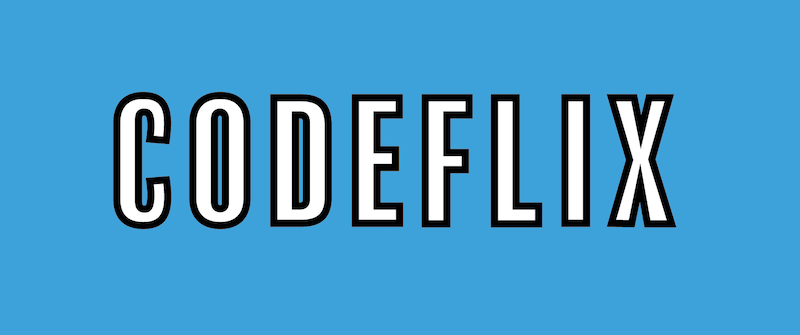

Please enter a username: dngawgaw
Please enter your password: heaven91

        8 - Dngawgaw
        pw: 1nve
         have been created
What is your username? dngawgaw
What is your password? heaven91

        8 - Dngawgaw
        pw: 1nve
         has logged in!

            What would you like to do?
            Add - add a new user
            Login - logic a user
            Update - update a user
            Logout - logout a user
            Search - search for shows
            Watch - pick something from your watchlist
            View - view watch list
            Delete - remove show from watchlist
            Quit - close the application
        
What would you like to do?(add, update, login, logout, search, watch, view, delete or quit) search
What is the name of the series? ted lasso
{'id': 44458, 'url': 'https://www.tvmaze.com/shows/44458/ted-lasso', 'name': 'Ted Lasso', 'type': 'Scripted', 'language': 'English', 'genres': ['Drama', 'Comedy', 'Sports'], 'status': 'To Be De

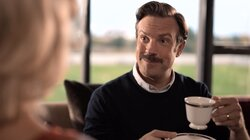

What would you like to delete? ted lasso
Ted Lasso has been removed from your watchlist!
What would you like to do?(add, update, login, logout, search, watch, view, delete or quit) view
What would you like to do?(add, update, login, logout, search, watch, view, delete or quit) view
What would you like to do?(add, update, login, logout, search, watch, view, delete or quit) search
What is the name of the series? ted lasso
{'id': 44458, 'url': 'https://www.tvmaze.com/shows/44458/ted-lasso', 'name': 'Ted Lasso', 'type': 'Scripted', 'language': 'English', 'genres': ['Drama', 'Comedy', 'Sports'], 'status': 'To Be Determined', 'runtime': None, 'averageRuntime': 42, 'premiered': '2020-08-14', 'ended': None, 'officialSite': 'https://tv.apple.com/show/ted-lasso/umc.cmc.vtoh0mn0xn7t3c643xqonfzy', 'schedule': {'time': '', 'days': ['Wednesday']}, 'rating': {'average': 8.1}, 'weight': 100, 'network': None, 'webChannel': {'id': 310, 'name': 'Apple TV+', 'country': None, 'officialSite': 'https://tv.ap

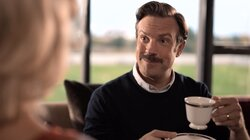

What would you like to do?(add, update, login, logout, search, watch, view, delete or quit) watch


Title: Ted Lasso | Episodes: 34

Summary: 
<p><b>Ted Lasso </b>centers on an idealistic — and clueless — all-American football coach hired to manage an English football club — despite having no soccer coaching experience at all.</p>


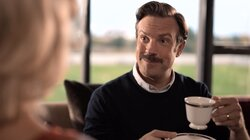

What would you like to watch? ted lasso
Now playing: Pilot


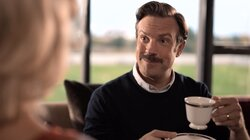

Now playing: Biscuits


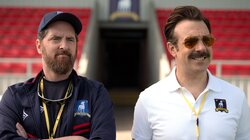

Now playing: Trent Crimm: The Independent


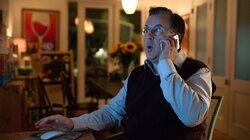

Are you still watching? y/n: n
What would you like to do?(add, update, login, logout, search, watch, view, delete or quit) update

        8 - Dngawgaw
        pw: 1nve
        
Please enter the updated username or enter skip to keep your current username!skip
Please enter the updated password or enter skip to keep current password!heaven
dngawgaw's info has been updated!
What would you like to do?(add, update, login, logout, search, watch, view, delete or quit) logout
You have successfully logged out!
What would you like to do next, login, add or quit? quit
Thanks for watching


In [120]:
codeflix.run()

##  Exercise 1:
Discuss what other classes, methods, or fields (attributes) we could make to improve our streaming service using these principles. <br> <br>
Start making a few of them and see where it leads...

In [145]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix (1).png'
class Theater():
    def __init__(self):
        self.users = set()
        self.current_user = None
    #add user
    def add_user(self):
        username = input("Please enter a username: ")
        if username in {u.username for u in self.users}:
            print("User with that name already exists. Please try again...") 
        else:
            password = input("Please enter your password: ")
            user = User(username, password)
            self.users.add(user)
            print(f"{user} have been created")
            
        self.login_user()
    #choose/login a user
    def login_user(self):
        username = input("What is your username? ")
        password = input("What is your password? ")
        
        for user in self.users:
            if user.username == username and user.check_password(password):
                self.current_user = user
                print(f"{user} has logged in!")
                break
        else:
            print("Username and/or password is incorrect!")
    
    #logout a user:
    def logout(self):
        self.current_user = None
        print("You have successfully logged out!")
    
    #update user info
    def update_user(self):
        if self.current_user:
            print(self.current_user)
            new_user = input("Please enter the updated username or enter skip to keep your current username!")
            if new_user.lower() != 'skip':
                self.current_user.username == new_user
            new_pw = input("Please enter the updated password or enter skip to keep current password!")
            if new_pw.lower() != 'skip':
                self.current_user.password = new_pw[::-2]
            print(f"{self.current_user.username}'s info has been updated!")
        else:
            print("Please login to update user")
            self.login_user
        
    #watchlist related functionality
    def add_to_watchlist(self, query = ''):
        show = Series()
        show.get_info(query)
        
        self.current_user.watch_list.append(show)
        
        print(f"{show.title} has been added to the watchlist!")
        
    #view watchlist
    def view_watchlist(self):
        for series in self.current_user.watch_list:
            print(f"\n\n{series} | Episodes: {len(series)}")
            print(f"\nSummary: \n{series.summary}")
            display(Image(series.episodes[0].link))
            
    #remove from watch_list
    def delete(self):
        print("Your current watchlist: ")
        self.view_watchlist()
        
        response = input("What would you like to delete? ")
        for series in self.current_user.watch_list:
            if series.title.title() == response.title():
                self.current_user.watch_list.remove(series)
                print(f"{response.title()} has been removed from your watchlist!")
                break
        else:
            print("That title is not in your watchlist!")
    
    #choose a series from your watchlist
    def choose_from_watchlist(self):
        self.view_watchlist()
        
        watch = input("What would you like to watch? ")
        if watch.lower() in list(map(lambda x: x.title.lower(), self.current_user.watch_list)):
            for series in self.current_user.watch_list:
                if series.title.lower() == watch.lower():
                    series.watch()
        else:
            response = input(f"{watch} is not in your watchlist...Would you like to add it? y/n")
            if response in ('y', 'yes'):
                self.add_to_watchlist(watch)
                
                print("................")
                sleep(2)
                print("................")
                self.current_user.watch_list[-1].watch()
                
    #Nhien's update starts from here            
    def view_cast(self):
        self.view_watchlist()

        show_title = input("Which show's cast would you like to see? ")
        for series in self.current_user.watch_list:
            if series.title.lower() == show_title.lower():
                r = requests.get(f"https://api.tvmaze.com/shows/{series.id}/cast")
                if r.status_code == 200:
                    cast_data = r.json()
                    cast_members = [cast['person']['name'] for cast in cast_data]
                    print(f"Cast members for {series.title}:")
                    for member in cast_members:
                        print(member)
                else:
                    print(f"Error: Status Code {r.status_code}")
                break
        else:
            print("The show is not in your watchlist.")

        
    def view_schedule(self):
        r = requests.get("https://api.tvmaze.com/schedule") 
        if r.status_code == 200:
            schedule_data = r.json()
            print("Web Streaming Schedule: ")
            for show in schedule_data:
                title = show['name']
                time = show['show']['premiered']
                print(f"{title}: {time}")
        else:
            print(f"Error: Status Code {r.status_code}")

    #Nhien's update ends here
    #run method to drive program
    def run(self):
        """
        Method alowing users to choose a series and play episodes
        """
        
        display(Image(generic_image))
        
        if self.users:
            self.login_user()
        else:
            self.add_user()
            
        print("""
            What would you like to do?
            Add - add a new user
            Login - logic a user
            Update - update a user
            Logout - logout a user
            Search - search for shows
            Watch - pick something from your watchlist
            View - view watch list
            View cast - View the cast of the movie
            Schedule - View web streaming schedule
            Delete - remove show from watchlist
            Quit - close the application
        """)
        
        while True:
            response = input("What would you like to do?(add, update, login, logout, search, watch, view, view cast, schedule delete or quit) ")
            
            if response.lower() == "search":
                self.add_to_watchlist()
                
            elif response.lower() == "watch":
                self.choose_from_watchlist()
                
            elif response.lower() == "view cast":
                self.view_cast()
            
            elif response.lower() == "schedule":
                self.view_schedule()
                
            elif response.lower() == "add":
                self.add_user()
            
            elif response.lower() == "logout":
                self.logout()
                
                new_response = input("What would you like to do next, login, add, view cast or quit? ")
                if new_response.lower() == "add":
                    self.add_user()
                elif new_response.lower() == "login":
                    self.login_user()
                elif new_response.lower() == "view cast":
                    self.view_cast()
                elif new_response.lower() == "quit":
                    print("Thanks for watching")
                    break
                else:
                    print("Please enter a valid response and try again!")
                    
            elif response.lower() == "login":
                self.login_user()
                
            elif response.lower() == "update":
                self.update_user()
            
            elif response.lower() == "view":
                self.view_watchlist()
            
            elif response.lower() == "delete":
                self.delete()
                
            elif response.lower() == "quit":
                print(f"Thanks for watching {self.current_user}!")
                break
            
            else:
                print("Invalid input, please try again!")
                    

In [146]:
codeflix = Theater()

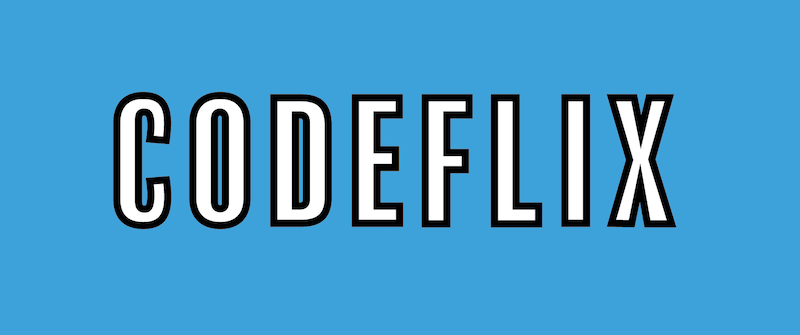

Please enter a username: qwe
Please enter your password: 123

        5 - Qwe
        pw: 31
         have been created
What is your username? qwe
What is your password? 123

        5 - Qwe
        pw: 31
         has logged in!

            What would you like to do?
            Add - add a new user
            Login - logic a user
            Update - update a user
            Logout - logout a user
            Search - search for shows
            Watch - pick something from your watchlist
            View - view watch list
            View cast - View the cast of the movie
            Schedule - View web streaming schedule
            Delete - remove show from watchlist
            Quit - close the application
        
What would you like to do?(add, update, login, logout, search, watch, view, view cast, schedule delete or quit) view cast
Which show's cast would you like to see? girls
The show is not in your watchlist.
What would you like to do?(add, update, login, logout, search,

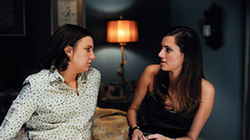

Which show's cast would you like to see? girls
Cast members for Girls:
Lena Dunham
Allison Williams
Jemima Kirke
Zosia Mamet
Adam Driver
Alex Karpovsky
Andrew Rannells
Ebon Moss-Bachrach
What would you like to do?(add, update, login, logout, search, watch, view, view cast, schedule delete or quit) schedule
Web Streaming Schedule: 
Sarah Jessica Parker, Sadie Stanley, Lexi Underwood, DeVon Franklin, Jess Sims: 1975-11-03
Anthony Ramos, Maitreyi Ramakrishnan: 2023-04-17
Episode 39: 2023-04-17
Vivica A. Fox, Marsha Warfield: 2022-09-12
Laurie Metcalf: 1997-08-11
Thu, Jun 8, 2023: 1972-09-15
Ep. #12635: 1973-03-26
Ep. #9037: 1987-03-23
Ep. #15238: 1963-04-01
Episode 113: 1966-04-01
Episode 66: 1998-01-12
Episode 114: 2011-07-11
June 8, 2023: 1975-10-20
Episode 159: 2014-09-01
Suresh Krishnan Vs. David Ford Vs. Allison Strekal, Show # 8824.: 1984-09-10
Better Together: 2021-11-26
Episode 15: 2011-09-24
I Want You Back: 2023-04-20
Episode 194: 1983-09-19
Can You Drink a Lorna Doon?: 2023-04-

In [147]:
codeflix.run()